In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import math

import scipy.stats as sp

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
library(tidyverse)


NameError: name 'library' is not defined

In [3]:
file = "caffeine.csv"
df=pd.read_csv(file)
df


,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water
608,Tonic Water,295.735000,110,0,Water


In [4]:
df2=df.copy()

In [5]:
df2['caffeine_per_100ml']= df2["Caffeine (mg)"]/df2["Volume (ml)"]*100
df2['calories_per_100ml']= df2["Calories"]/df2["Volume (ml)"]*100
df2

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,57.955534,0.000000
2,Hell Energy Coffee,250.191810,150,100,Coffee,39.969334,59.954001
3,Killer Coffee (AU),250.191810,0,430,Coffee,171.868136,0.000000
4,Nescafe Gold,250.191810,0,66,Coffee,26.379760,0.000000
...,...,...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water,15.498109,0.000000
606,Polar Seltzer Water,354.882000,0,0,Water,0.000000,0.000000
607,Yerbae Sparkling Water,354.882000,0,100,Water,28.178380,0.000000
608,Tonic Water,295.735000,110,0,Water,0.000000,37.195462


In [6]:
df2.columns

Index(['drink', 'Volume (ml)', 'Calories', 'Caffeine (mg)', 'type',
       'caffeine_per_100ml', 'calories_per_100ml'],
      dtype='object')

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   drink               610 non-null    object 
 1   Volume (ml)         610 non-null    float64
 2   Calories            610 non-null    int64  
 3   Caffeine (mg)       610 non-null    int64  
 4   type                610 non-null    object 
 5   caffeine_per_100ml  610 non-null    float64
 6   calories_per_100ml  610 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 33.5+ KB


In [8]:
df2.type.unique()

array(['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water'], dtype=object)

In [9]:
#df.drink.unique()

In [10]:
#df.drink.sort_values().unique()

In [11]:
df2.type.sort_values()

0      Coffee
111    Coffee
112    Coffee
113    Coffee
114    Coffee
        ...  
585     Water
584     Water
608     Water
595     Water
609     Water
Name: type, Length: 610, dtype: object

In [12]:
df2.type.value_counts().index.tolist()


['Energy Drinks', 'Coffee', 'Soft Drinks', 'Tea', 'Energy Shots', 'Water']

findfont: Font family ['Comic Sans'] not found. Falling back to DejaVu Sans.


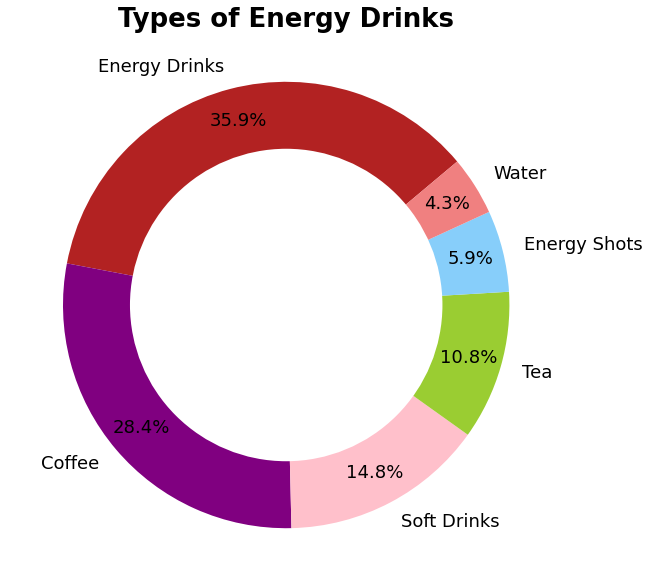

In [13]:
drink_types = df2.type.value_counts().index.tolist()
drink_type_counts = df2.type.value_counts().values.tolist()
colors = ["firebrick", "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
explode = (0, 0, 0, 0, 0, 0)
fig = plt.figure(figsize=(10,10))
plt.title("Types of Energy Drinks", fontsize = 26, fontweight = "bold", font = "Comic Sans")
plt.axis("equal")
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.pie(drink_type_counts, explode=explode, labels=drink_types, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=40, textprops={'fontsize': 18}, pctdistance=0.85)
fig.gca().add_artist(centre_circle)
plt.show()

In [14]:
df2.drink.value_counts()


Costa Coffee                 1
Redline Xtreme Shot          1
Equip Pure Energy Shot       1
Mana Energy Potion           1
Clif Shot Energy Gel         1
                            ..
V Energy Drink               1
XL Energy Drink (EU)         1
Crave Energy Drink (UK)      1
Bomba (EU)                   1
MiO Energy Water Enhancer    1
Name: drink, Length: 610, dtype: int64

In [15]:
grouped_df2 = df2.groupby(["type"])
grouped_df2.head()

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,57.955534,0.000000
2,Hell Energy Coffee,250.191810,150,100,Coffee,39.969334,59.954001
3,Killer Coffee (AU),250.191810,0,430,Coffee,171.868136,0.000000
4,Nescafe Gold,250.191810,0,66,Coffee,26.379760,0.000000
173,28 Black Energy Drink,250.191810,125,80,Energy Drinks,31.975467,49.961667
174,4 Purpose Energy Drink,250.191810,70,70,Energy Drinks,27.978534,27.978534
175,BEEBAD Energy Drink,250.191810,110,80,Energy Drinks,31.975467,43.966267
176,Black Bruin Energy Drink,250.191810,122,38,Energy Drinks,15.188347,48.762587
177,Blu Frog Energy Drink,250.191810,90,80,Energy Drinks,31.975467,35.972401


In [16]:
df2mean = grouped_df2.mean()
df2mean.head()

,Volume (ml),Calories,Caffeine (mg),caffeine_per_100ml,calories_per_100ml
type,,,,,
Coffee,335.870855,73.497110,200.589595,66.819081,19.479665
Energy Drinks,388.971198,86.671233,147.867580,38.395152,23.188496
Energy Shots,57.742259,16.500000,193.416667,387.558298,40.880874
Soft Drinks,355.243454,111.111111,33.677778,9.506661,31.199914
Tea,360.474080,52.757576,55.863636,17.255757,12.240317


In [17]:
df2.corr()

,Volume (ml),Calories,Caffeine (mg),caffeine_per_100ml,calories_per_100ml
Volume (ml),1.000000,0.341998,0.110770,-0.457612,-0.043641
Calories,0.341998,1.000000,-0.126021,-0.208557,0.727940
Caffeine (mg),0.110770,-0.126021,1.000000,0.446584,-0.145241
caffeine_per_100ml,-0.457612,-0.208557,0.446584,1.000000,0.143286
calories_per_100ml,-0.043641,0.727940,-0.145241,0.143286,1.000000


<AxesSubplot:>

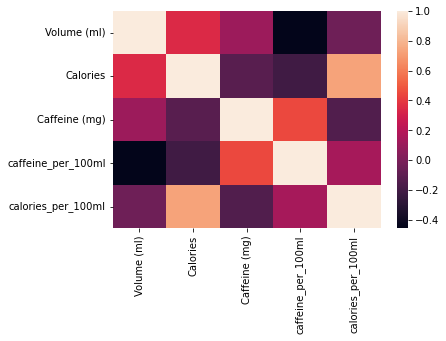

In [18]:
sns.heatmap(df2.corr())

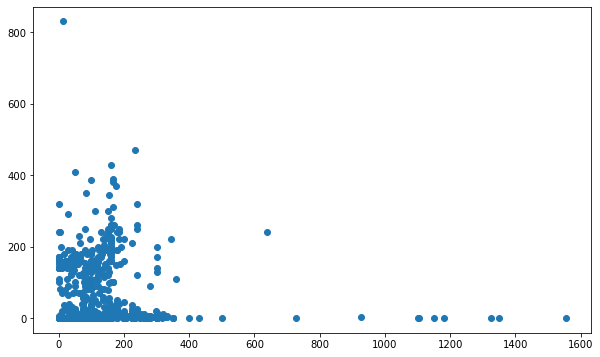

In [19]:
#Scatter graph Calories vs caffeine
plt.figure(figsize=(10,6))
x=df2["Caffeine (mg)"].values
y=df2["Calories"].values
plt.scatter(x,y)
plt.show()

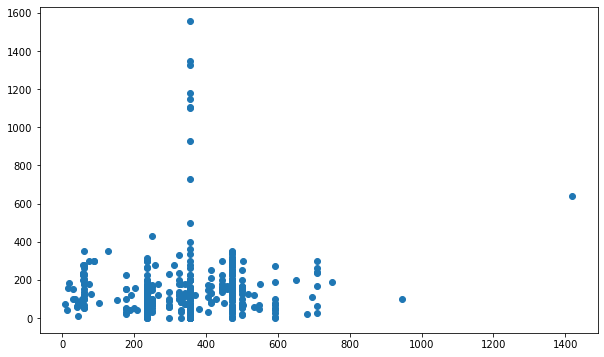

In [20]:
#Scatter graph volumn vs caffeine
plt.figure(figsize=(10,6))
x=df2["Volume (ml)"].values
y=df2["Caffeine (mg)"].values
plt.scatter(x,y)
plt.show()


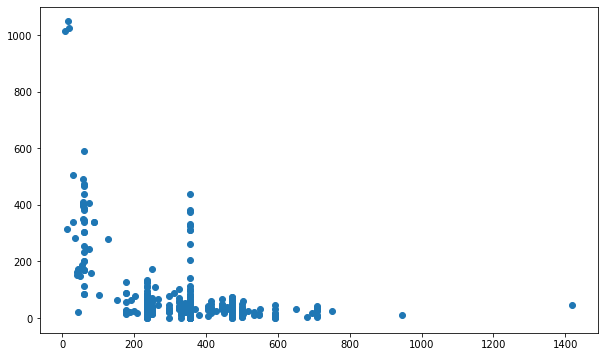

In [21]:
#Scatter graph volumn vs caffeine per 100 ml

plt.figure(figsize=(10,6))
x=df2["Volume (ml)"].values
y=df2["caffeine_per_100ml"].values
plt.scatter(x,y)
plt.show()

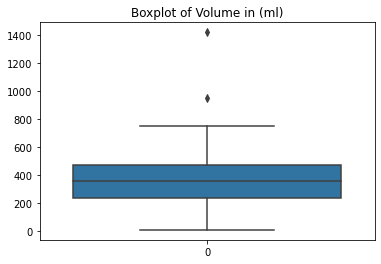

In [22]:
# linear correlation between caffeine per 100 ml and volume (ml)
# First, I would like to make a boxplot of both caffeine per 100ml and of volume in ml and drop any outliers.

# plt.boxplot(df2["Volume (ml)"].values.tolist())
# plt.show()

sns.boxplot(data = df2["Volume (ml)"])# y="Volume (ml)")
plt.title("Boxplot of Volume in (ml)")
plt.show()

# There are about two outliers, both greather than 830 ml

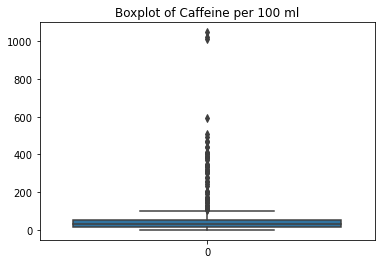

In [23]:
sns.boxplot(data = df2["caffeine_per_100ml"])# y="Volume (ml)")
plt.title("Boxplot of Caffeine per 100 ml")
plt.show()

# Clearly there are lots of outliers.

In [24]:
# clearly there are lots of outliers. It is better to do some quantiles.

quart25 = df2["caffeine_per_100ml"].quantile(0.25)
quart75 = df2["caffeine_per_100ml"].quantile(0.75)

iqr = quart75 - quart25
outliertop = quart75 + 1.5*iqr
outlierbot = quart25 - 1.5*iqr

print([outlierbot, outliertop])

[-37.33635405571429, 103.55554804132076]


In [25]:
# Let us remove the outliers before creating a regression line. Before that, let us examine who the outliers are.

df2filter = df2.loc[df2.caffeine_per_100ml > outliertop, :].head(40)
df2.loc[df2["Volume (ml)"] > 820]

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
29,Starbucks Bottled Iced Coffee,1419.528,240,640,Coffee,45.085409,16.907028
530,McDonalds Sweet Tea,946.352,160,100,Tea,10.566893,16.907028


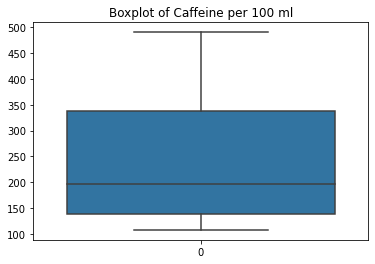

In [26]:
sns.boxplot(data = df2filter["caffeine_per_100ml"])# y="Volume (ml)")
plt.title("Boxplot of Caffeine per 100 ml")
plt.show()

The r-squared is: 0.002013348121099606


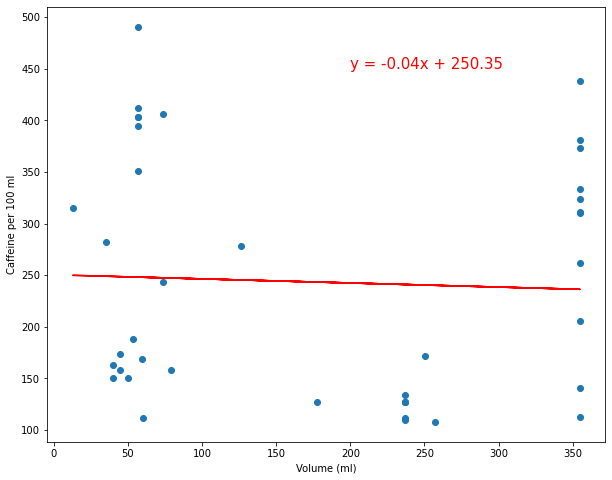

In [27]:
plt.figure(figsize = (10,8))

x_values = df2filter['Volume (ml)']
y_values = df2filter['caffeine_per_100ml']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(200,450),fontsize=15,color="red")
plt.xlabel('Volume (ml)')
plt.ylabel('Caffeine per 100 ml')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [28]:
caffeineper100 = df2['caffeine_per_100ml'].values.tolist()
logcaf = []
for x in range(len(caffeineper100)):
    if caffeineper100[x] > 0:
        logcaf.append(math.log(caffeineper100[x]))


The r-squared is: 0.15444755778004574


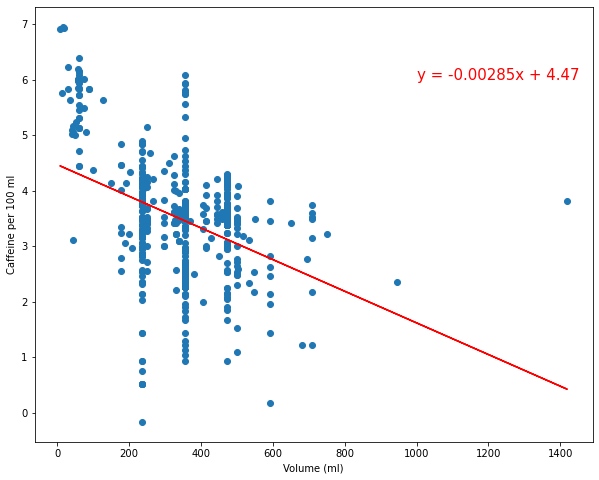

In [29]:
plt.figure(figsize = (10,8))

x_values = df.loc[df2['caffeine_per_100ml'] > 0,'Volume (ml)']
y_values = logcaf

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1000,6),fontsize=15,color="red")
plt.xlabel('Volume (ml)')
plt.ylabel('Caffeine per 100 ml')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [30]:
# It turns out that this graph is really three clusters. Let us isolate them.
mask11 = df2filter["Volume (ml)"] < 100
mask22 = df2filter["Volume (ml)"] > 300
df2volcluster1 = df2filter.loc[mask11]
df2volcluster2 = df2filter.loc[mask22]
df2volcluster3 = df2filter.loc[~((mask11) | (mask22))]


In [31]:
df2volcluster2

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
82,Biohazard Coffee,354.882,3,928,Coffee,261.495370,0.845351
84,Black Insomnia Coffee,354.882,0,1105,Coffee,311.371104,0.000000
85,Black Label Brewed Coffee,354.882,0,1555,Coffee,438.173816,0.000000
89,Cannonball Coffee Maximum Charge (UK),354.882,0,1101,Coffee,310.243968,0.000000
91,Death Wish Coffee,354.882,0,728,Coffee,205.138609,0.000000
92,Devils Brew Extreme Caffeine Coffee,354.882,0,1325,Coffee,373.363541,0.000000
95,High Voltage Coffee (AU),354.882,0,1150,Coffee,324.051375,0.000000
99,Stipe Miocic Extra Strength Coffee,354.882,0,500,Coffee,140.891902,0.000000
101,Taft Coffee (EU),354.882,0,1182,Coffee,333.068457,0.000000
102,Very Strong Coffee,354.882,0,1350,Coffee,380.408136,0.000000


The r-squared is: 0.6117407755154691


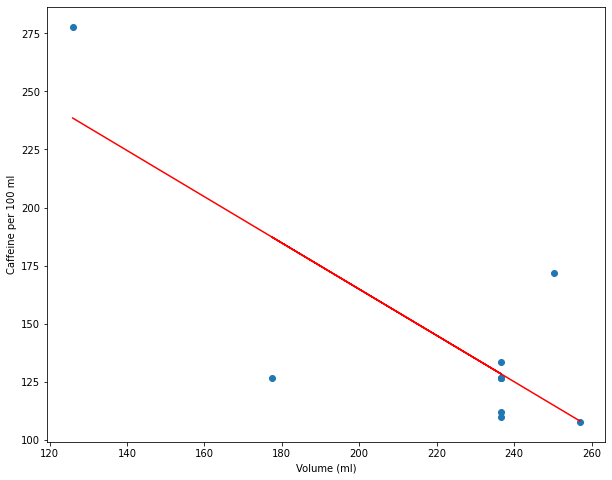

In [32]:
plt.figure(figsize = (10,8))

x_values = df2volcluster3['Volume (ml)']
y_values = df2volcluster3['caffeine_per_100ml']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Volume (ml)')
plt.ylabel('Caffeine per 100 ml')
print(f"The r-squared is: {rvalue**2}")
plt.show()

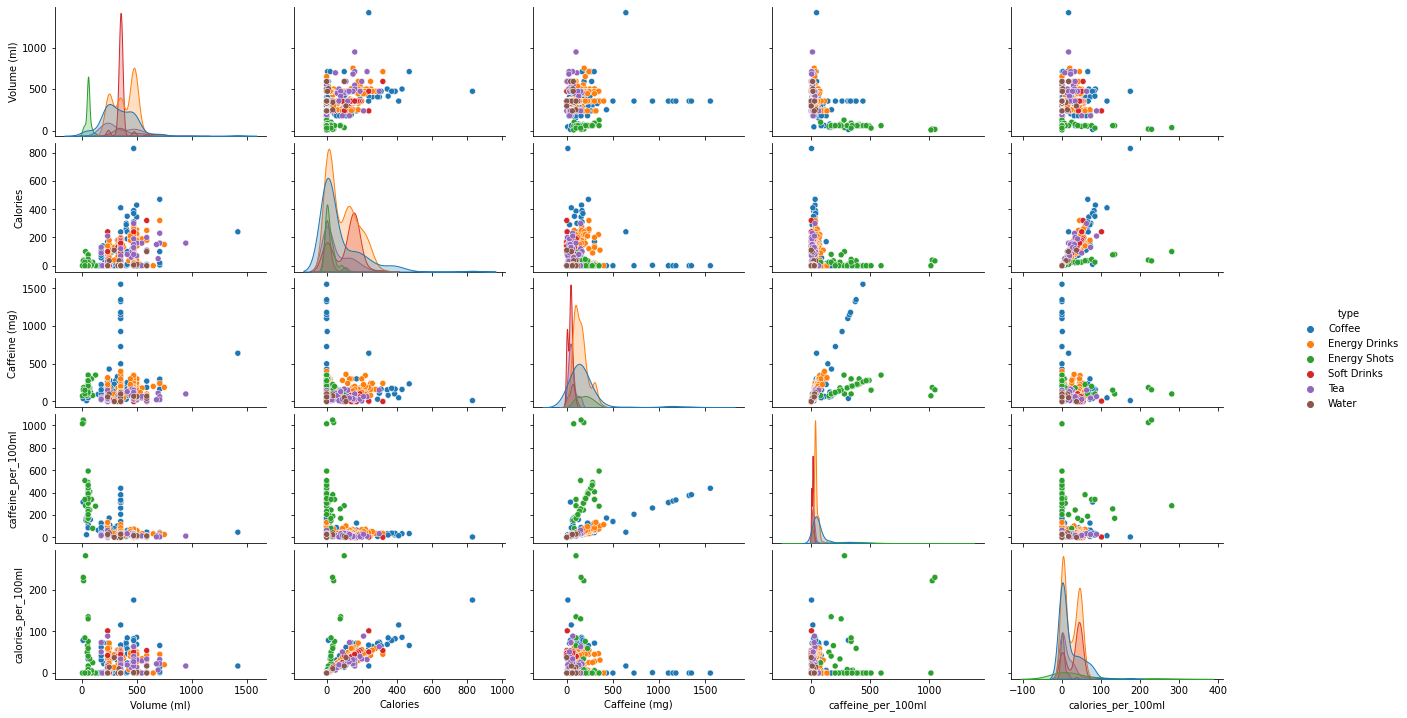

In [33]:
g=sns.pairplot(df2,hue='type')
g.fig.set_figheight(10)
g.fig.set_figwidth(20)
plt.show() 

C:\Users\hanng\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


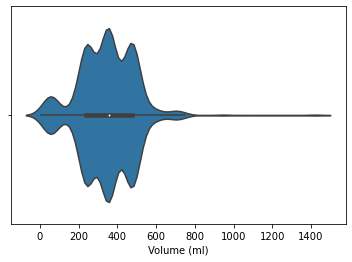

In [34]:
sns.violinplot(df2["Volume (ml)"], hue=df2.type)
plt.show()

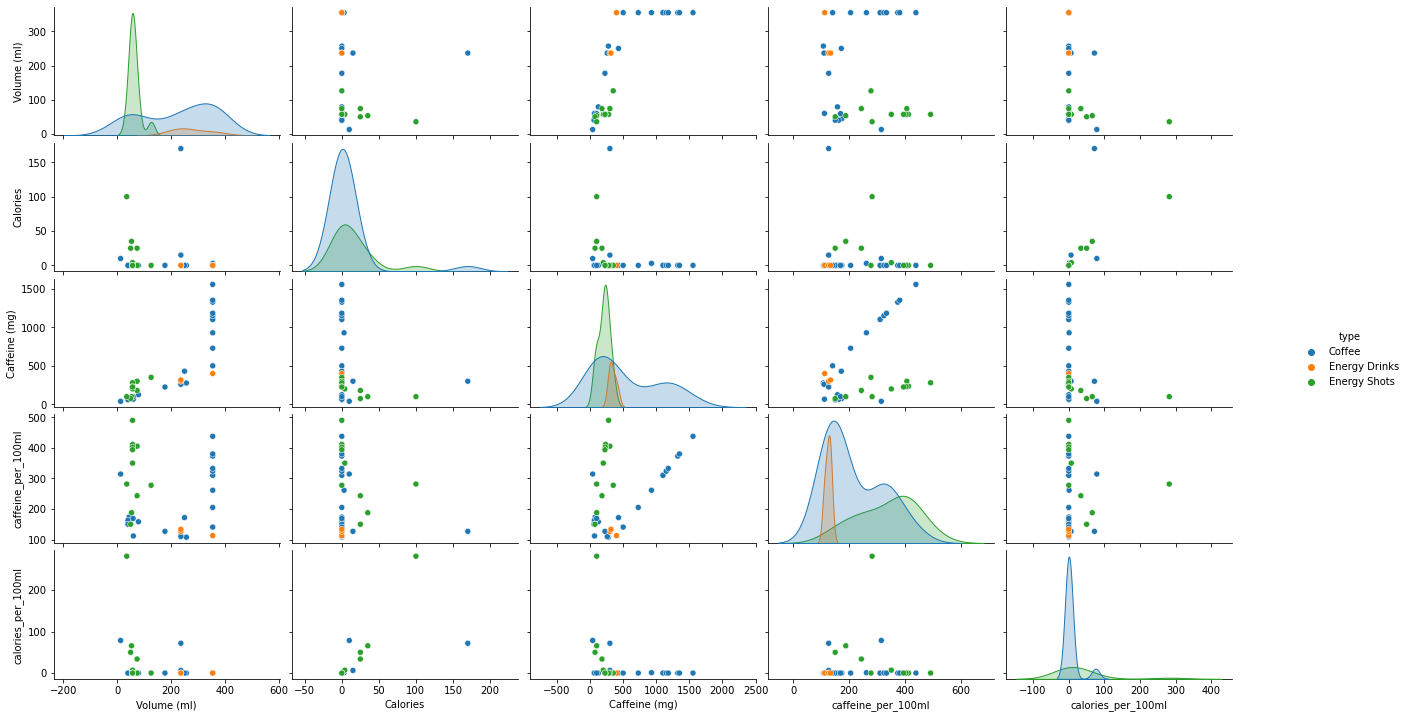

In [35]:
g=sns.pairplot(df2filter,hue='type')
g.fig.set_figheight(10)
g.fig.set_figwidth(20)
plt.show() 

In [36]:
df2.type.unique().tolist()

['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea', 'Water']

In [37]:
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
df_coffee=df2.loc[df2.type=="Coffee"].reset_index()
# df_coffee

In [38]:
#df_coffee.plot()

In [39]:
#Scatter graph volumn vs caffeine for coffee

plt.figure(figsize=(10,6))
x_coffee=df_coffee["Volume (ml)"].values
y_coffee=df_coffee["caffeine_per_100ml"].values
# plt.scatter(x,y)
# plt.show()

<Figure size 720x432 with 0 Axes>

In [40]:
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
df_energyd=df2.loc[df2.type=="Energy Drinks"].reset_index()
# df_energyd

In [41]:
#Scatter graph volumn vs caffeine for energy drinks

plt.figure(figsize=(10,6))
x_energyd=df_energyd["Volume (ml)"].values
y_energyd=df_energyd["caffeine_per_100ml"].values
# plt.scatter(x,y)
# plt.show()

<Figure size 720x432 with 0 Axes>

In [42]:
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
df_energys=df2.loc[df2.type=="Energy Shots"].reset_index()
# df_energys

In [43]:
#Scatter graph volumn vs caffeine for energy shorts

plt.figure(figsize=(10,6))
x_energys=df_energys["Volume (ml)"].values
y_energys=df_energys["caffeine_per_100ml"].values
# plt.scatter(x,y)
# plt.show()

<Figure size 720x432 with 0 Axes>

In [44]:
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
df_soft=df2.loc[df2.type=="Soft Drinks"].reset_index()
# df_soft

In [45]:
#Scatter graph volumn vs caffeine for soft drinks

plt.figure(figsize=(10,6))
x_soft=df_soft["Volume (ml)"].values
y_soft=df_soft["caffeine_per_100ml"].values
# plt.scatter(x,y)
# plt.show()

<Figure size 720x432 with 0 Axes>

In [46]:
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
df_tea=df2.loc[df2.type=="Tea"].reset_index()
# df_tea

In [47]:
#Scatter graph volumn vs caffeine for tea

plt.figure(figsize=(10,6))
x_tea=df_tea["Volume (ml)"].values
y_tea=df_tea["caffeine_per_100ml"].values
# plt.scatter(x,y)
# plt.show()

<Figure size 720x432 with 0 Axes>

In [48]:
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
df_water=df2.loc[df2.type=="Water"].reset_index()
# df_water

In [49]:
#Scatter graph volumn vs caffeine for water

plt.figure(figsize=(10,6))
x_water=df_water["Volume (ml)"].values
y_water=df_water["caffeine_per_100ml"].values
# plt.scatter(x,y)
# plt.show()

<Figure size 720x432 with 0 Axes>

In [50]:
# keys=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea','Water']
# caffeine_100ml_dict={
#     'Coffee': y_coffee,
#     'Energy Drinks': y_energyd,
#     'Energy Shots': y_energys,
#     'Soft Drinks': y_soft,
#     'Tea':y_tea,
#     'Water': y_water}

# df_caffeine_per_100ml = pd.DataFrame(caffeine_100ml_dict)
# plt.rcParams["figure.figsize"] = [20, 15]
# plt.rcParams["figure.autolayout"] = True
# ax = boxdata[keys].plot(kind='box')
# plt.show()


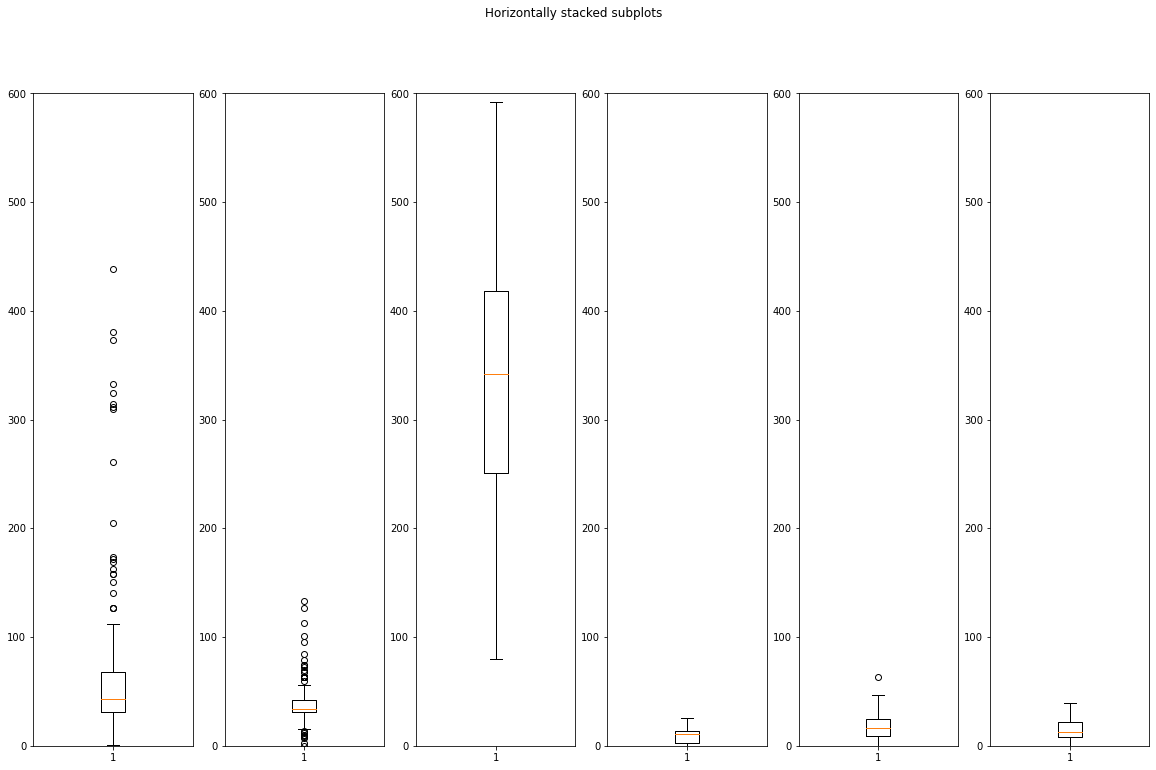

In [51]:
#plt.figure(figsize=(20,6))
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1, 6)
fig.suptitle('Horizontally stacked subplots')
fig.set_size_inches(20,12)

ax1.boxplot(y_coffee)
ax1.set_ylim([0,600])
ax2.boxplot(y_energyd)
ax2.set_ylim([0,600])
ax3.boxplot(y_energys)
ax3.set_ylim([0,600])
ax4.boxplot(y_soft)
ax4.set_ylim([0,600])
ax5.boxplot(y_tea)
ax5.set_ylim([0,600])
ax6.boxplot(y_water)
ax6.set_ylim([0,600])

plt.show()

In [52]:
y_coffee.shape

(173,)

In [53]:
y_energyd.shape

(219,)

In [54]:
y_energys.shape

(36,)

In [55]:
y_soft.shape

(90,)

In [56]:
y_tea.shape

(66,)

In [57]:
y_water.shape

(26,)

In [58]:
#plt.boxplot([pd.DataFrame(x_coffee),pd.DataFrame(x_energyd)])

#plt.show()

In [59]:
# #caffeine vs type vs volume

# #Groupby type
# df_drink_type = df[['type','Volume (ml)','Calories','Caffeine (mg)']]
# drinks_type_groupby = df_drink_type.groupby(['type'])
# drinks_type = drinks_type_groupby['type'] 

# #caffeine
# drinks_caffeine = drinks_type_groupby['Caffeine (mg)'].mean()

# #volume
# drinks_volume =drinks_type_groupby['Volume (ml)'].mean()

# #calories
# drinks_calories =drinks_type_groupby['Calories'].mean()


# #create a DataFrame
# summary=pd.DataFrame({
#     "Caffeine":drinks_caffeine,
#     "Volume":drinks_volume,
#     "Calories":drinks_calories
# })

# summary

In [60]:
df2.head(40)

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,57.955534,0.000000
2,Hell Energy Coffee,250.191810,150,100,Coffee,39.969334,59.954001
3,Killer Coffee (AU),250.191810,0,430,Coffee,171.868136,0.000000
4,Nescafe Gold,250.191810,0,66,Coffee,26.379760,0.000000
5,Espresso Monster,248.417400,170,160,Coffee,64.407727,68.433210
6,Dunkin Donuts Shot In The Dark,239.545350,80,134,Coffee,55.939303,33.396599
7,Illy Issimo Cafe,201.099800,45,155,Coffee,77.076158,22.376949
8,Starbucks Doubleshot Espresso,192.227750,140,120,Coffee,62.425950,72.830276
9,TrueStart Performance Coffee,150.824850,0,95,Coffee,62.986968,0.000000


In [61]:
df2.loc[10].to_dict()

{'drink': 'Bizzy Cold Brew',
 'Volume (ml)': 78.96124499999999,
 'Calories': 0,
 'Caffeine (mg)': 125,
 'type': 'Coffee',
 'caffeine_per_100ml': 158.30550797419673,
 'calories_per_100ml': 0.0}

In [62]:
df2.loc[10, "drink"]

'Bizzy Cold Brew'

In [63]:
df2starbucks = pd.DataFrame({})

i = 1
a = 0

rows = []
for i in range(len(df2)):
    if ~(df2.drink.values.tolist()[i].find('Starbucks')):
        rows.append(df2.loc[i].to_dict())
    
df2starbucks = pd.DataFrame(rows)
df2starbucks

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,Starbucks Doubleshot Espresso,192.22775,140,120,Coffee,62.425950,72.830276
1,Starbucks Bottled Frappuccino,405.15695,300,110,Coffee,27.149972,74.045379
2,Starbucks Bottled Iced Coffee,1419.52800,240,640,Coffee,45.085409,16.907028
3,Starbucks Caramel Macchiato,473.17600,250,150,Coffee,31.700678,52.834463
4,Starbucks Cold Brew Coffee,473.17600,5,205,Coffee,43.324260,1.056689
5,Starbucks Decaf Coffee,473.17600,0,25,Coffee,5.283446,0.000000
6,Starbucks Grande Caffe Americano,473.17600,15,225,Coffee,47.551017,3.170068
7,Starbucks Grande Caffe Latte,473.17600,190,150,Coffee,31.700678,40.154192
8,Starbucks Grande Caffe Mocha,473.17600,370,175,Coffee,36.984124,78.195006
9,Starbucks Grande Cappuccino,473.17600,140,150,Coffee,31.700678,29.587299


In [64]:
df2starbucks["Caffeine (mg)"].describe()

count     27.000000
mean     175.370370
std      118.775207
min       25.000000
25%      122.500000
50%      150.000000
75%      225.000000
max      640.000000
Name: Caffeine (mg), dtype: float64

In [65]:
df2RedBull = pd.DataFrame({})

masks = df2.drink.values.tolist()
i = 1
a = 0

rows = []
for i in range(len(df2)):
    if ~(masks[i].find('Red Bull')):
        rows.append(df2.loc[i].to_dict())
    
df2RedBull = pd.DataFrame(rows)
df2RedBull

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,Red Bull,250.19181,117,80,Energy Drinks,31.975467,46.764121
1,Red Bull Editions,250.19181,113,80,Energy Drinks,31.975467,45.165347
2,Red Bull Sugarfree,250.19181,10,80,Energy Drinks,31.975467,3.996933
3,Red Bull Zero,250.19181,0,80,Energy Drinks,31.975467,0.000000
4,Red Bull Simply Cola,250.19181,0,32,Soft Drinks,12.790187,0.000000


In [66]:
df2dunkin = pd.DataFrame({})

#masksb = df2.drink.values.tolist()[i].find('Starbucks')
i = 1
a = 0

rows = []
for i in range(len(df2)):
    if ~(df2.drink.values.tolist()[i].find('Dunkin')):
        rows.append(df2.loc[i].to_dict())
    
df2dunkin = pd.DataFrame(rows)
df2dunkin

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,Dunkin Donuts Shot In The Dark,239.54535,80,134,Coffee,55.939303,33.396599
1,Bottled Iced Coffee Dunkin Donuts,405.15695,260,171,Coffee,42.205866,64.172662
2,Dunkin' Cold Brew,709.76400,5,260,Coffee,36.631895,0.704460
3,Dunkin' Donuts Iced Coffee,709.76400,20,297,Coffee,41.844895,2.817838
4,Dunkin' Donuts Iced Latte,709.76400,100,166,Coffee,23.388056,14.089190
5,Dunkin' Donuts Brewed Coffee,414.02900,5,210,Coffee,50.721085,1.207645
6,Dunkin' Donuts Dunkaccino,414.02900,350,83,Coffee,20.046905,84.535141
7,Dunkin' Donuts Extra Charged Coffee,414.02900,10,252,Coffee,60.865302,2.415290
8,Dunkin' Donuts Latte,414.02900,100,166,Coffee,40.093810,24.152898
9,Dunkin' Donuts Iced Tea,709.76400,230,63,Tea,8.876190,32.405137


In [67]:
df2dutchbros = pd.DataFrame({})

#masksb = df2.drink.values.tolist()[i].find('Starbucks')
i = 1
a = 0

rows = []
for i in range(len(df2)):
    if ~(df2.drink.values.tolist()[i].find('Dutch Bros')):
        rows.append(df2.loc[i].to_dict())
    
df2dutchbros = pd.DataFrame(rows)
df2dutchbros

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,Dutch Bros Coffee (Classic),591.4700,10,187,Coffee,31.616143,1.690703
1,Dutch Bros Blue Rebel Energy Drink,248.4174,116,80,Energy Drinks,32.203863,46.695602


In [68]:
df2peet = pd.DataFrame({})

#masksb = df2.drink.values.tolist()[i].find('Starbucks')
i = 1
a = 0

rows = []
for i in range(len(df2)):
    if ~(df2.drink.values.tolist()[i].find('Peet')):
        rows.append(df2.loc[i].to_dict())
    
df2peet = pd.DataFrame(rows)
df2peet

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,Peet's Coffee Espresso,44.36025,0,70,Coffee,157.798930,0.000000
1,Peet's Decaf Espresso,44.36025,0,10,Coffee,22.542704,0.000000
2,Peet's Brewed Coffee,473.17600,5,267,Coffee,56.427207,1.056689
3,Peet's Caffe Americano,473.17600,10,140,Coffee,29.587299,2.113379
4,Peet's Caffe Latte,473.17600,190,140,Coffee,29.587299,40.154192
5,Peet's Caffe Mocha,473.17600,390,165,Coffee,34.870746,82.421763
6,Peet's Cappuccino,473.17600,140,140,Coffee,29.587299,29.587299
7,Peet's Iced Coffee,473.17600,0,150,Coffee,31.700678,0.000000
8,Peet's Iced Latte,473.17600,120,140,Coffee,29.587299,25.360542
9,Peet's Iced Mocha,473.17600,310,165,Coffee,34.870746,65.514734


In [69]:
df2peet = df2.loc[df2.drink.str.contains('Peet')]
df2peet

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
24,Peet's Coffee Espresso,44.36025,0,70,Coffee,157.798930,0.000000
25,Peet's Decaf Espresso,44.36025,0,10,Coffee,22.542704,0.000000
49,Peet's Brewed Coffee,473.17600,5,267,Coffee,56.427207,1.056689
50,Peet's Caffe Americano,473.17600,10,140,Coffee,29.587299,2.113379
51,Peet's Caffe Latte,473.17600,190,140,Coffee,29.587299,40.154192
52,Peet's Caffe Mocha,473.17600,390,165,Coffee,34.870746,82.421763
53,Peet's Cappuccino,473.17600,140,140,Coffee,29.587299,29.587299
54,Peet's Iced Coffee,473.17600,0,150,Coffee,31.700678,0.000000
55,Peet's Iced Latte,473.17600,120,140,Coffee,29.587299,25.360542
56,Peet's Iced Mocha,473.17600,310,165,Coffee,34.870746,65.514734


In [70]:
df2peet.columns

Index(['drink', 'Volume (ml)', 'Calories', 'Caffeine (mg)', 'type',
       'caffeine_per_100ml', 'calories_per_100ml'],
      dtype='object')

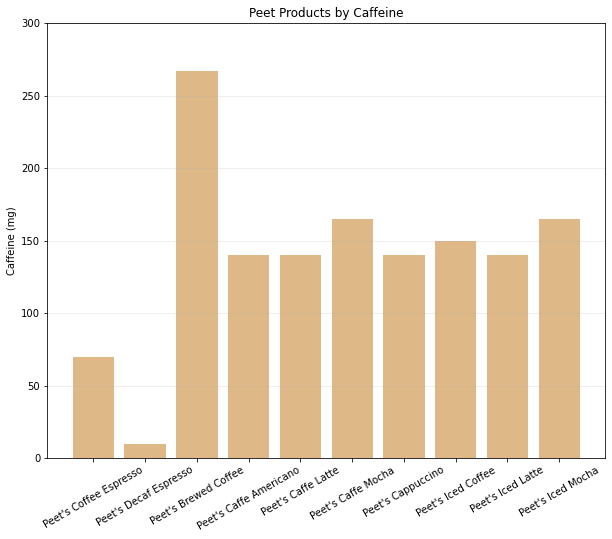

In [71]:
# step 1, get the data
x = df2peet.drink
y = df2peet["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="burlywood")

# step 3, customization
plt.title("Peet Products by Caffeine")
plt.ylabel("Caffeine (mg)")
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, 300)
plt.xticks(rotation=30)

# step 4, saving/showing
plt.show()

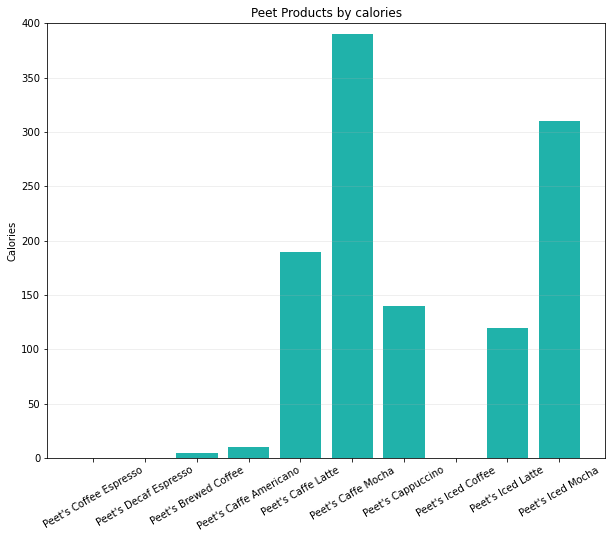

In [72]:
# step 1, get the data
x = df2peet.drink
y= df2peet.Calories


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightseagreen")

# step 3, customization
plt.title("Peet Products by calories")
plt.ylabel("Calories")
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, 400)
plt.xticks(rotation=30)
# step 4, saving/showing
plt.show()

In [73]:
df2starbucks = df2.loc[df2.drink.str.contains('Starbucks')]
df2starbucks

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
8,Starbucks Doubleshot Espresso,192.22775,140,120,Coffee,62.425950,72.830276
16,Starbucks Bottled Frappuccino,405.15695,300,110,Coffee,27.149972,74.045379
29,Starbucks Bottled Iced Coffee,1419.52800,240,640,Coffee,45.085409,16.907028
57,Starbucks Caramel Macchiato,473.17600,250,150,Coffee,31.700678,52.834463
58,Starbucks Cold Brew Coffee,473.17600,5,205,Coffee,43.324260,1.056689
59,Starbucks Decaf Coffee,473.17600,0,25,Coffee,5.283446,0.000000
60,Starbucks Grande Caffe Americano,473.17600,15,225,Coffee,47.551017,3.170068
61,Starbucks Grande Caffe Latte,473.17600,190,150,Coffee,31.700678,40.154192
62,Starbucks Grande Caffe Mocha,473.17600,370,175,Coffee,36.984124,78.195006
63,Starbucks Grande Cappuccino,473.17600,140,150,Coffee,31.700678,29.587299


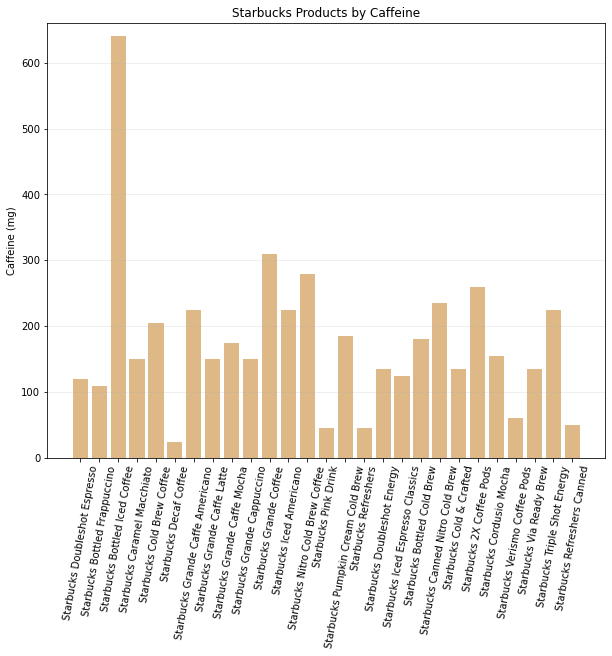

In [74]:
# step 1, get the data
x = df2starbucks.drink
y = df2starbucks["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="burlywood")

# step 3, customization
plt.title("Starbucks Products by Caffeine")
plt.ylabel("Caffeine (mg)")
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=80)

# step 4, saving/showing
plt.show()

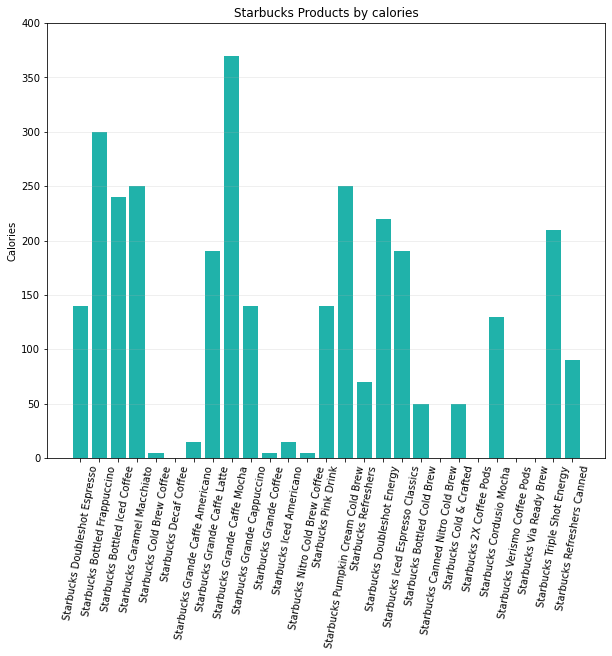

In [75]:
# step 1, get the data
x = df2starbucks.drink
y= df2starbucks.Calories


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightseagreen")

# step 3, customization
plt.title("Starbucks Products by calories")
plt.ylabel("Calories")
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, 400)
plt.xticks(rotation=80)
# step 4, saving/showing
plt.show()

In [76]:
df2latte=df2.loc[df2.drink.str.contains("Latte")]
df2latte

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
21,Premier Protein Cafe Latte,340.09525,160,120,Coffee,35.284233,47.045644
33,Dunkin' Donuts Iced Latte,709.76400,100,166,Coffee,23.388056,14.089190
39,Biggby Creamy Lattes,473.17600,387,100,Coffee,21.133785,81.787749
44,Latte,473.17600,160,154,Coffee,32.546029,33.814057
45,McDonalds (McCafe) Latte,473.17600,190,142,Coffee,30.009975,40.154192
51,Peet's Caffe Latte,473.17600,190,140,Coffee,29.587299,40.154192
55,Peet's Iced Latte,473.17600,120,140,Coffee,29.587299,25.360542
61,Starbucks Grande Caffe Latte,473.17600,190,150,Coffee,31.700678,40.154192
79,Dunkin' Donuts Latte,414.02900,100,166,Coffee,40.093810,24.152898
117,La Colombe Draft Latte,266.16150,90,120,Coffee,45.085409,33.814057


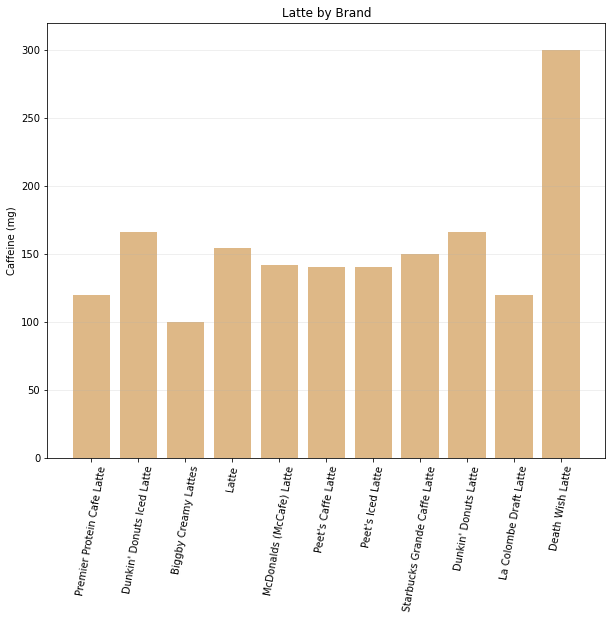

In [77]:
# step 1, get the data
x = df2latte.drink
y = df2latte["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="burlywood")

# step 3, customization
plt.title("Latte by Brand")
plt.ylabel("Caffeine (mg)")
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=80)

# step 4, saving/showing
plt.show()

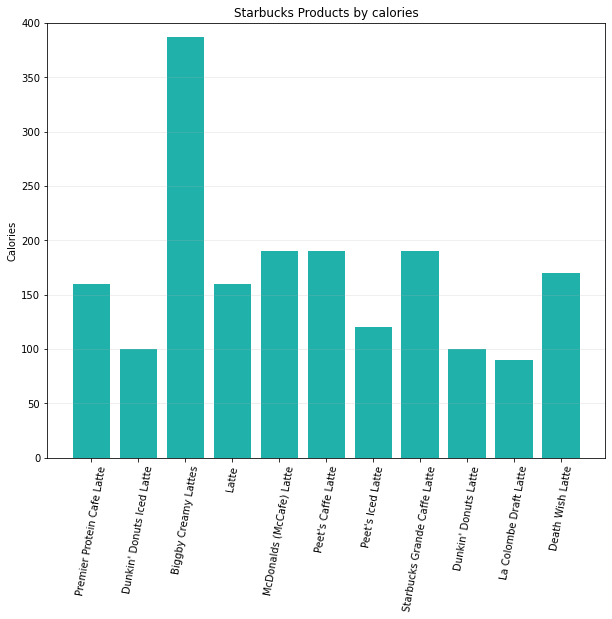

In [78]:
# step 1, get the data
x = df2latte.drink
y= df2latte.Calories


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightseagreen")

# step 3, customization
plt.title("Starbucks Products by calories")
plt.ylabel("Calories")
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, 400)
plt.xticks(rotation=80)
# step 4, saving/showing
plt.show()

In [79]:
df2mean

,Volume (ml),Calories,Caffeine (mg),caffeine_per_100ml,calories_per_100ml
type,,,,,
Coffee,335.870855,73.497110,200.589595,66.819081,19.479665
Energy Drinks,388.971198,86.671233,147.867580,38.395152,23.188496
Energy Shots,57.742259,16.500000,193.416667,387.558298,40.880874
Soft Drinks,355.243454,111.111111,33.677778,9.506661,31.199914
Tea,360.474080,52.757576,55.863636,17.255757,12.240317
Water,394.590111,11.538462,53.730769,14.406834,3.186064


In [80]:
df2mean.columns

Index(['Volume (ml)', 'Calories', 'Caffeine (mg)', 'caffeine_per_100ml',
       'calories_per_100ml'],
      dtype='object')

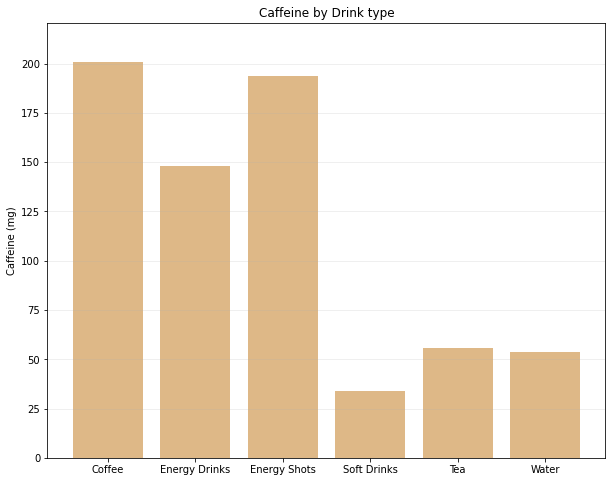

In [81]:
# step 1, get the data
x = df2mean.index
y = df2mean["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="burlywood")

# step 3, customization
plt.title("Caffeine by Drink type")
plt.ylabel("Caffeine (mg)")
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=0)

# step 4, saving/showing
plt.show()

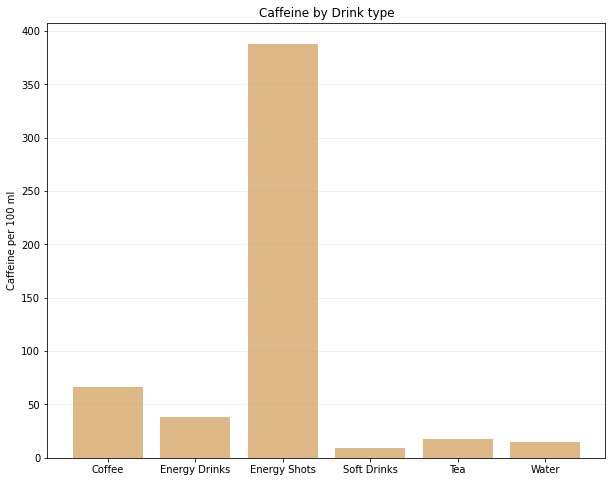

In [82]:
# step 1, get the data
x = df2mean.index
y = df2mean["caffeine_per_100ml"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="burlywood")

# step 3, customization
plt.title("Caffeine by Drink type")
plt.ylabel("Caffeine per 100 ml")
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=0)

# step 4, saving/showing
plt.show()

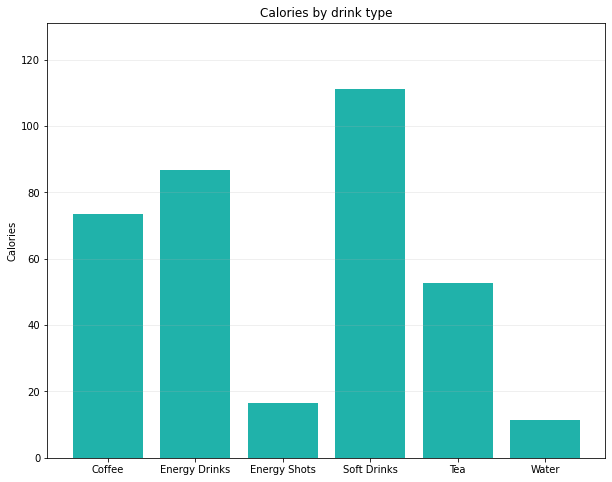

In [83]:
# step 1, get the data
x = df2mean.index
y= df2mean.Calories


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightseagreen")

# step 3, customization
plt.title("Calories by drink type")
plt.ylabel("Calories")
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=0)
# step 4, saving/showing
plt.show()

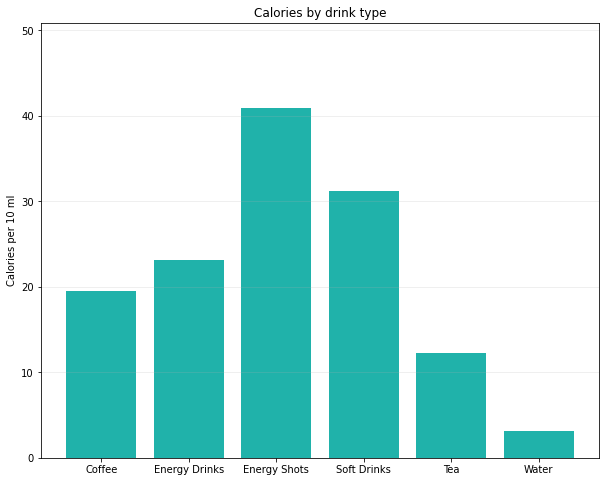

In [84]:
# step 1, get the data
x = df2mean.index
y= df2mean.calories_per_100ml


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightseagreen")

# step 3, customization
plt.title("Calories by drink type")
plt.ylabel("Calories per 10 ml")
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+10)
plt.xticks(rotation=0)
# step 4, saving/showing
plt.show()

In [85]:
df2

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,57.955534,0.000000
2,Hell Energy Coffee,250.191810,150,100,Coffee,39.969334,59.954001
3,Killer Coffee (AU),250.191810,0,430,Coffee,171.868136,0.000000
4,Nescafe Gold,250.191810,0,66,Coffee,26.379760,0.000000
...,...,...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water,15.498109,0.000000
606,Polar Seltzer Water,354.882000,0,0,Water,0.000000,0.000000
607,Yerbae Sparkling Water,354.882000,0,100,Water,28.178380,0.000000
608,Tonic Water,295.735000,110,0,Water,0.000000,37.195462


In [86]:
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
df_coffee=df2.loc[(df2.type=="Coffee") & (df2["Caffeine (mg)"] <200)].reset_index()
df_coffee

,index,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,57.955534,0.000000
1,2,Hell Energy Coffee,250.191810,150,100,Coffee,39.969334,59.954001
2,4,Nescafe Gold,250.191810,0,66,Coffee,26.379760,0.000000
3,5,Espresso Monster,248.417400,170,160,Coffee,64.407727,68.433210
4,6,Dunkin Donuts Shot In The Dark,239.545350,80,134,Coffee,55.939303,33.396599
...,...,...,...,...,...,...,...,...
123,168,Nescafe 3 in 1 Instant Coffee,177.441000,74,50,Coffee,28.178380,41.704003
124,169,Gloria Jean's Coffee,59.975058,0,67,Coffee,111.713106,0.000000
125,170,Biggby Espresso,59.147000,0,100,Coffee,169.070283,0.000000
126,171,Greek Coffee (Metrios),59.147000,25,50,Coffee,84.535141,42.267571


The r-squared is: 0.015055974356400792


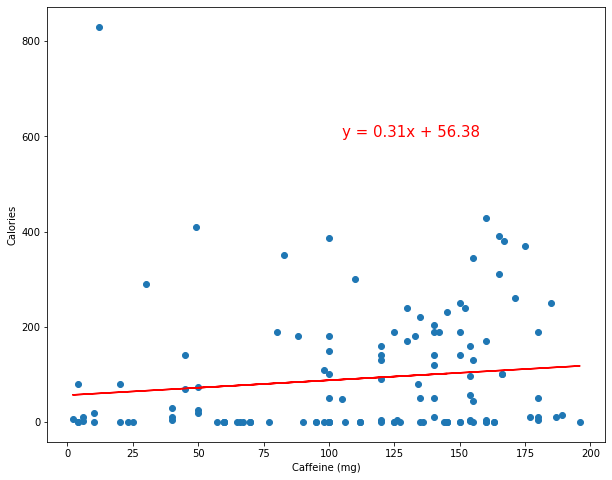

In [87]:
plt.figure(figsize = (10,8))

x_values = df_coffee['Caffeine (mg)']
y_values = df_coffee['Calories']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(105,600),fontsize=15,color="red")
plt.xlabel('Caffeine (mg)')
plt.ylabel('Calories')
print(f"The r-squared is: {rvalue**2}")
plt.show()

C:\Users\hanng\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


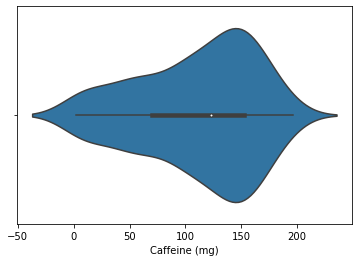

In [88]:
sns.violinplot(df_coffee["Caffeine (mg)"], hue=df2.type)
plt.show()

C:\Users\hanng\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


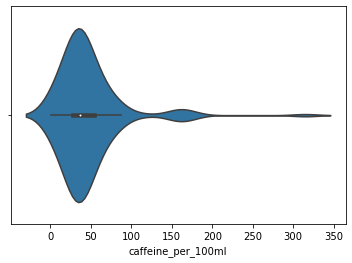

In [89]:
sns.violinplot(df_coffee["caffeine_per_100ml"], hue=df2.type)
plt.show()

In [90]:
ggplot(data = df_coffee, mapping = aes(x = "Calories", y = ["Caffeine (mg)"])) + geom_violin()
       

NameError: name 'ggplot' is not defined

In [ ]:
df_coffee_sort=df_coffee.sort_values("Caffeine (mg)",ascending=False)
df_coffee_sort

In [ ]:
# df2peet = df2.loc[df2.drink.str.contains('Peet')]
# df2peet

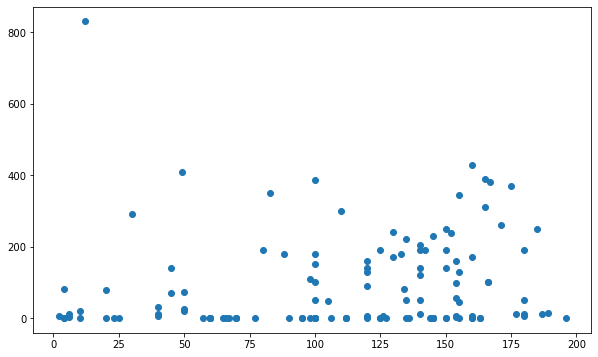

In [91]:
#Scatter graph Calories vs caffeine
plt.figure(figsize=(10,6))
x=df_coffee["Caffeine (mg)"].values
y=df_coffee["Calories"].values
plt.scatter(x,y)
plt.show()

The r-squared is: 0.015055974356400792


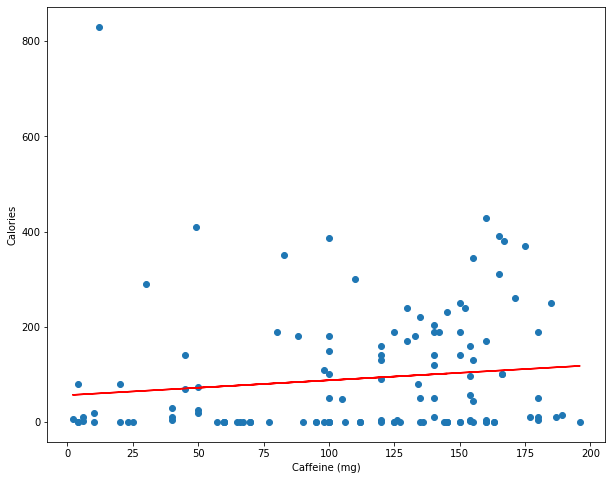

In [92]:
plt.figure(figsize = (10,8))

x_values = df_coffee['Caffeine (mg)']
y_values = df_coffee['Calories']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(250,100),fontsize=15,color="red")
plt.xlabel('Caffeine (mg)')
plt.ylabel('Calories')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [93]:
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
df_energyd=df2.loc[df2.type=="Energy Drinks"].reset_index()
df_energyd

,index,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,173,28 Black Energy Drink,250.19181,125,80,Energy Drinks,31.975467,49.961667
1,174,4 Purpose Energy Drink,250.19181,70,70,Energy Drinks,27.978534,27.978534
2,175,BEEBAD Energy Drink,250.19181,110,80,Energy Drinks,31.975467,43.966267
3,176,Black Bruin Energy Drink,250.19181,122,38,Energy Drinks,15.188347,48.762587
4,177,Blu Frog Energy Drink,250.19181,90,80,Energy Drinks,31.975467,35.972401
...,...,...,...,...,...,...,...,...
214,387,Redline Princess,236.58800,0,300,Energy Drinks,126.802712,0.000000
215,388,Redline Xtreme Energy Drink,236.58800,0,316,Energy Drinks,133.565523,0.000000
216,389,Roaring Lion Energy Drink,236.58800,100,77,Energy Drinks,32.546029,42.267571
217,390,Spark Energy Drink Mix,236.58800,15,120,Energy Drinks,50.721085,6.340136


In [94]:
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
df_energyd1=df2.loc[(df2.type=="Energy Drinks") & (df2["Caffeine (mg)"] <200)].reset_index()
df_energyd1

,index,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,173,28 Black Energy Drink,250.19181,125,80,Energy Drinks,31.975467,49.961667
1,174,4 Purpose Energy Drink,250.19181,70,70,Energy Drinks,27.978534,27.978534
2,175,BEEBAD Energy Drink,250.19181,110,80,Energy Drinks,31.975467,43.966267
3,176,Black Bruin Energy Drink,250.19181,122,38,Energy Drinks,15.188347,48.762587
4,177,Blu Frog Energy Drink,250.19181,90,80,Energy Drinks,31.975467,35.972401
...,...,...,...,...,...,...,...,...
163,384,LYFT Energy Mix,236.58800,4,125,Energy Drinks,52.834463,1.690703
164,386,Perk Energy Beverage,236.58800,90,100,Energy Drinks,42.267571,38.040814
165,389,Roaring Lion Energy Drink,236.58800,100,77,Energy Drinks,32.546029,42.267571
166,390,Spark Energy Drink Mix,236.58800,15,120,Energy Drinks,50.721085,6.340136


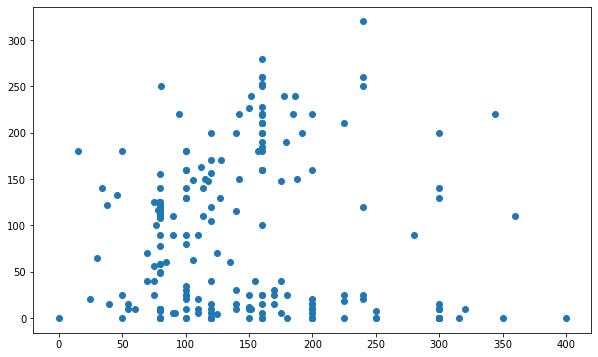

In [95]:
#Scatter graph Calories vs caffeine
plt.figure(figsize=(10,6))
x=df_energyd["Caffeine (mg)"].values
y=df_energyd["Calories"].values
plt.scatter(x,y)
plt.show()

The r-squared is: 0.0724535774689456


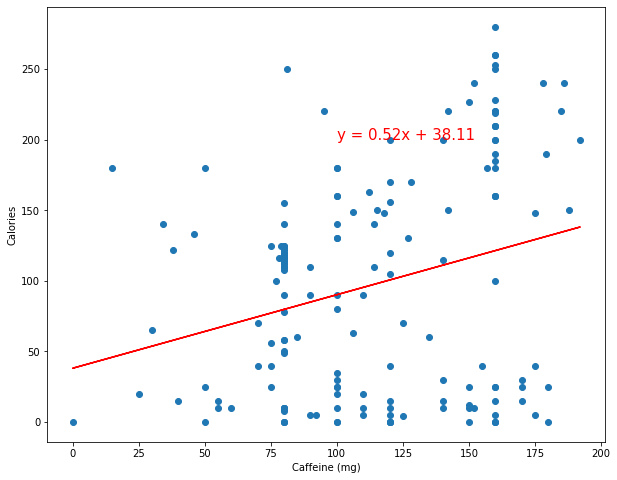

In [96]:
plt.figure(figsize = (10,8))

x_values = df_energyd1['Caffeine (mg)']
y_values = df_energyd1['Calories']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,200),fontsize=15,color="red")
plt.xlabel('Caffeine (mg)')
plt.ylabel('Calories')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.007882570696298571


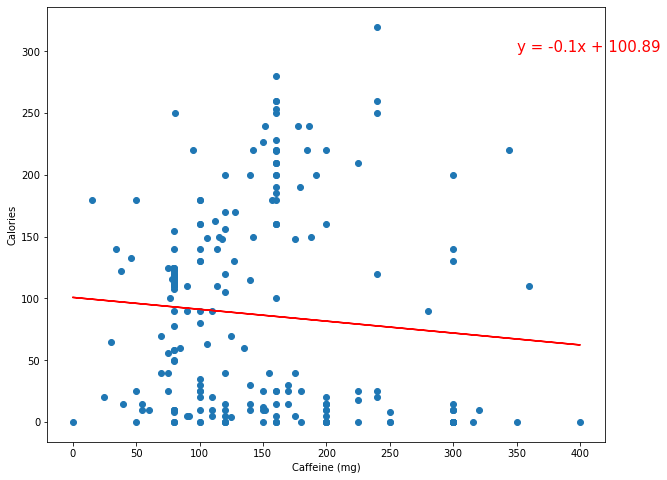

In [97]:
plt.figure(figsize = (10,8))

x_values = df_energyd['Caffeine (mg)']
y_values = df_energyd['Calories']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(350,300),fontsize=15,color="red")
plt.xlabel('Caffeine (mg)')
plt.ylabel('Calories')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [98]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   drink               610 non-null    object 
 1   Volume (ml)         610 non-null    float64
 2   Calories            610 non-null    int64  
 3   Caffeine (mg)       610 non-null    int64  
 4   type                610 non-null    object 
 5   caffeine_per_100ml  610 non-null    float64
 6   calories_per_100ml  610 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 33.5+ KB


In [99]:
df_energys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               36 non-null     int64  
 1   drink               36 non-null     object 
 2   Volume (ml)         36 non-null     float64
 3   Calories            36 non-null     int64  
 4   Caffeine (mg)       36 non-null     int64  
 5   type                36 non-null     object 
 6   caffeine_per_100ml  36 non-null     float64
 7   calories_per_100ml  36 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ KB


In [100]:
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
dfw=df2.loc[df2.type=="Energy Shots"].reset_index()
dfw

,index,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,392,Spike Energy Double Shot,125.983110,0,350,Energy Shots,277.815018,0.000000
1,393,Zombie Blood Energy Potion,100.549900,25,80,Energy Shots,79.562486,24.863277
2,394,Proper Wild Energy Shot,73.933750,25,180,Energy Shots,243.461207,33.814057
3,395,Redline Max 300,73.933750,0,300,Energy Shots,405.768678,0.000000
4,396,5 Hour Energy,57.076855,4,200,Energy Shots,350.404731,7.008095
5,397,5 Hour Energy Extra Strength,57.076855,0,230,Energy Shots,402.965440,0.000000
6,398,E6 Energy Shot,57.076855,0,235,Energy Shots,411.725558,0.000000
7,399,Eternal Energy Extra Strength,57.076855,0,280,Energy Shots,490.566623,0.000000
8,400,Eternal Energy Shot,57.076855,0,230,Energy Shots,402.965440,0.000000
9,401,Woke Up Energy Shot,57.076855,0,225,Energy Shots,394.205322,0.000000


In [101]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               36 non-null     int64  
 1   drink               36 non-null     object 
 2   Volume (ml)         36 non-null     float64
 3   Calories            36 non-null     int64  
 4   Caffeine (mg)       36 non-null     int64  
 5   type                36 non-null     object 
 6   caffeine_per_100ml  36 non-null     float64
 7   calories_per_100ml  36 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ KB


In [102]:
df_energys.sort_values(["Caffeine (mg)"], ascending= False)

,index,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,392,Spike Energy Double Shot,125.983110,0,350,Energy Shots,277.815018,0.000000
24,416,Neu Nootropic Shot,59.147000,0,350,Energy Shots,591.745989,0.000000
16,408,Bang Shot,88.720500,0,300,Energy Shots,338.140565,0.000000
3,395,Redline Max 300,73.933750,0,300,Energy Shots,405.768678,0.000000
17,409,Redline Xtreme Shot,88.720500,5,300,Energy Shots,338.140565,5.635676
27,419,Phoenix Energy Shot,59.147000,0,280,Energy Shots,473.396791,0.000000
7,399,Eternal Energy Extra Strength,57.076855,0,280,Energy Shots,490.566623,0.000000
33,425,Tweaker Shot,59.147000,0,275,Energy Shots,464.943277,0.000000
18,410,7-Eleven Energy Shot,59.147000,0,260,Energy Shots,439.582735,0.000000
6,398,E6 Energy Shot,57.076855,0,235,Energy Shots,411.725558,0.000000


In [103]:
bins = [0, 100, 200, 300, 400]

# Create the names for the two bins
group_names = ["0-99", "100-199", "200-299", "300-400"] 

df_energys["Caffeine_group"] = pd.cut(df_energys["Caffeine (mg)"], bins, labels=group_names, include_lowest=True)
df_energys

,index,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,Caffeine_group
0,392,Spike Energy Double Shot,125.983110,0,350,Energy Shots,277.815018,0.000000,300-400
1,393,Zombie Blood Energy Potion,100.549900,25,80,Energy Shots,79.562486,24.863277,0-99
2,394,Proper Wild Energy Shot,73.933750,25,180,Energy Shots,243.461207,33.814057,100-199
3,395,Redline Max 300,73.933750,0,300,Energy Shots,405.768678,0.000000,200-299
4,396,5 Hour Energy,57.076855,4,200,Energy Shots,350.404731,7.008095,100-199
5,397,5 Hour Energy Extra Strength,57.076855,0,230,Energy Shots,402.965440,0.000000,200-299
6,398,E6 Energy Shot,57.076855,0,235,Energy Shots,411.725558,0.000000,200-299
7,399,Eternal Energy Extra Strength,57.076855,0,280,Energy Shots,490.566623,0.000000,200-299
8,400,Eternal Energy Shot,57.076855,0,230,Energy Shots,402.965440,0.000000,200-299
9,401,Woke Up Energy Shot,57.076855,0,225,Energy Shots,394.205322,0.000000,200-299


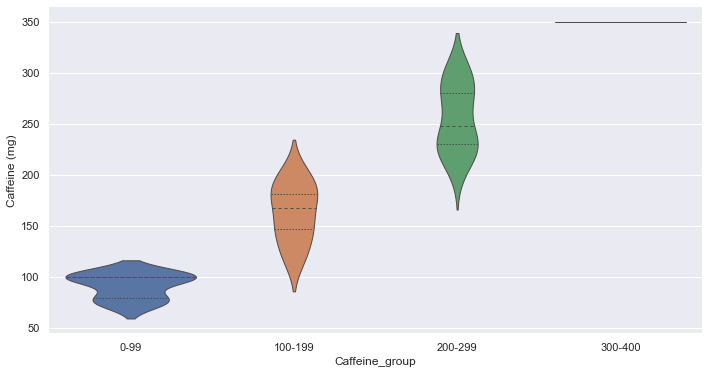

In [104]:
sns.set(rc={'figure.figsize':(11.7,6)})
sns.violinplot(data=df_energys, x="Caffeine_group", y="Caffeine (mg)", split=True, inner="quart", linewidth=1)
sns.despine(left=True)

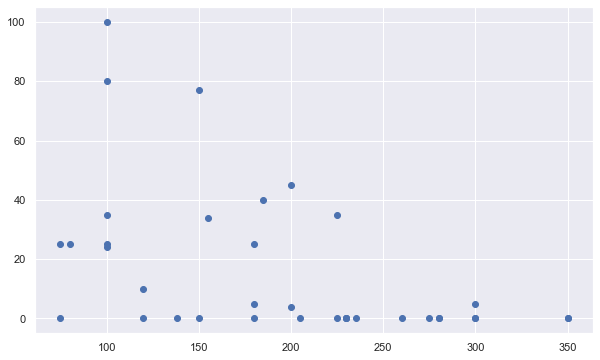

In [105]:
#Scatter graph Calories vs caffeine
plt.figure(figsize=(10,6))
x=df_energys["Caffeine (mg)"].values
y=df_energys["Calories"].values
plt.scatter(x,y)
plt.show()

The r-squared is: 0.23534234922957709


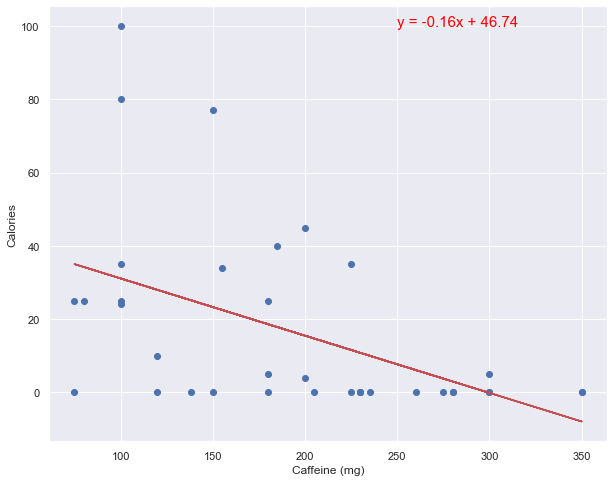

In [106]:
plt.figure(figsize = (10,8))

x_values = df_energys['Caffeine (mg)']
y_values = df_energys['Calories']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(250,100),fontsize=15,color="red")
plt.xlabel('Caffeine (mg)')
plt.ylabel('Calories')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [107]:
df.drink

0                     Costa Coffee
1      Coffee Friend Brewed Coffee
2               Hell Energy Coffee
3               Killer Coffee (AU)
4                     Nescafe Gold
                  ...             
605       Pep Talk Sparkling Water
606            Polar Seltzer Water
607         Yerbae Sparkling Water
608                    Tonic Water
609      MiO Energy Water Enhancer
Name: drink, Length: 610, dtype: object

In [108]:
df3=df2.loc[df2["Caffeine (mg)"] <500].reset_index()
df3

,index,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,0,Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000
1,1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,57.955534,0.000000
2,2,Hell Energy Coffee,250.191810,150,100,Coffee,39.969334,59.954001
3,3,Killer Coffee (AU),250.191810,0,430,Coffee,171.868136,0.000000
4,4,Nescafe Gold,250.191810,0,66,Coffee,26.379760,0.000000
...,...,...,...,...,...,...,...,...
594,605,Pep Talk Sparkling Water,354.882000,0,55,Water,15.498109,0.000000
595,606,Polar Seltzer Water,354.882000,0,0,Water,0.000000,0.000000
596,607,Yerbae Sparkling Water,354.882000,0,100,Water,28.178380,0.000000
597,608,Tonic Water,295.735000,110,0,Water,0.000000,37.195462


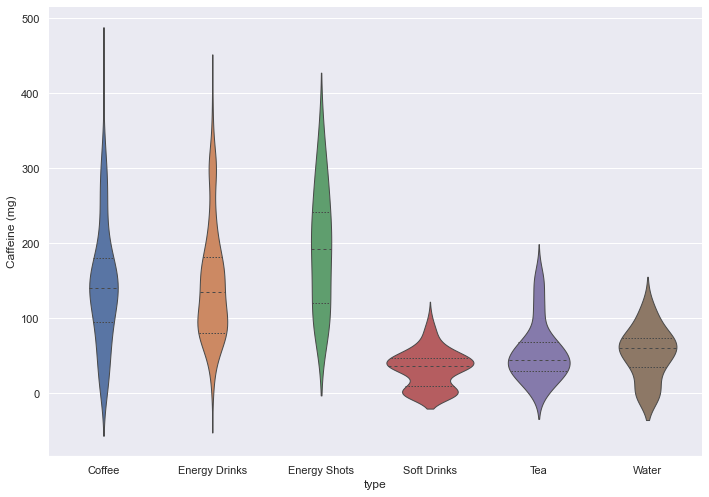

In [109]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=df3, x="type", y="Caffeine (mg)", split=True, inner="quart", linewidth=1)
sns.despine(left=True)

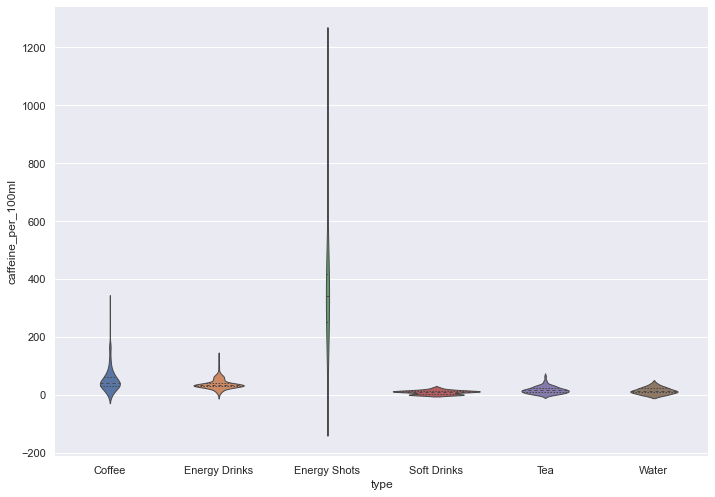

In [110]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=df3, x="type", y="caffeine_per_100ml", split=True, inner="quart", linewidth=1)
sns.despine(left=True)

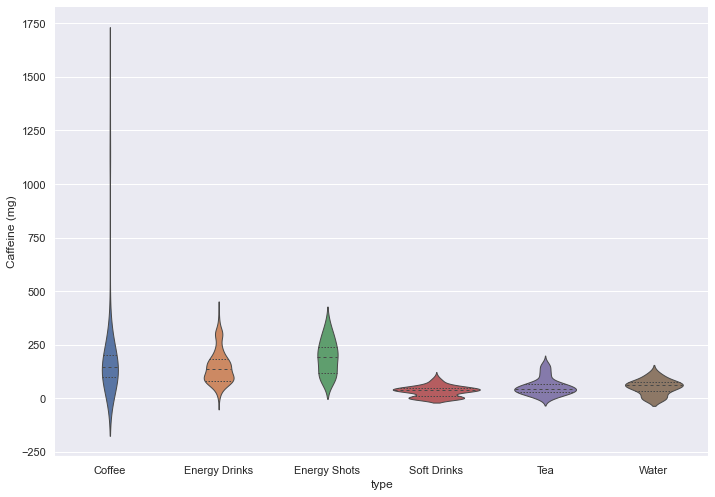

In [111]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=df2, x="type", y="Caffeine (mg)", split=True, inner="quart", linewidth=1)
sns.despine(left=True)

In [113]:
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
df_energyd=df2.loc[(df2.type=="Energy Drinks") & (df2["Caffeine (mg)"] <200)].reset_index()
df_energyd

,index,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,173,28 Black Energy Drink,250.19181,125,80,Energy Drinks,31.975467,49.961667
1,174,4 Purpose Energy Drink,250.19181,70,70,Energy Drinks,27.978534,27.978534
2,175,BEEBAD Energy Drink,250.19181,110,80,Energy Drinks,31.975467,43.966267
3,176,Black Bruin Energy Drink,250.19181,122,38,Energy Drinks,15.188347,48.762587
4,177,Blu Frog Energy Drink,250.19181,90,80,Energy Drinks,31.975467,35.972401
...,...,...,...,...,...,...,...,...
163,384,LYFT Energy Mix,236.58800,4,125,Energy Drinks,52.834463,1.690703
164,386,Perk Energy Beverage,236.58800,90,100,Energy Drinks,42.267571,38.040814
165,389,Roaring Lion Energy Drink,236.58800,100,77,Energy Drinks,32.546029,42.267571
166,390,Spark Energy Drink Mix,236.58800,15,120,Energy Drinks,50.721085,6.340136


In [115]:
df_energyd["drink"]

0          28 Black Energy Drink
1         4 Purpose Energy Drink
2            BEEBAD Energy Drink
3       Black Bruin Energy Drink
4          Blu Frog Energy Drink
                 ...            
163              LYFT Energy Mix
164         Perk Energy Beverage
165    Roaring Lion Energy Drink
166       Spark Energy Drink Mix
167             V8 +Energy Drink
Name: drink, Length: 168, dtype: object